# K-Nearest Neighbors

### What is K-Nearest Neighbors?
- The main idea behind K-NN is to find the K nearest data points, or neighbors, to a given data point and then predict the label or value of the given data point based on the labels or values of its K nearest neighbors.

- nearest neighbor is a non-parametric method, and that implies that it makes no assumptions about the underlying data. This is profitable over parametric techniques, which truly do make such assumptions. The models don't learn parameters from the training data index to concoct a discriminative function in order to  classify the test or unseen data collection. Rather model remembers the training data.

![alt text](https://miro.medium.com/max/405/1*0Pqqx6wGDfFm_7GLebg2Hw.png)

### Pros and Cons
Pros
- There is no training period for it, it stores the training dataset and learns from it only at the time of making real time predictions. This makess this algorithm pretty fast.

- Since KNN doesn't require any training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.

- KNN is very easy to implement.

Cons
- Does not work well with large datasets.

- The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.

- KNN is sensitive to noise in the dataset. We need to manually impute missing values and remove outliers.

With this being said, lets impliment this algorithm on the Fish dataset.

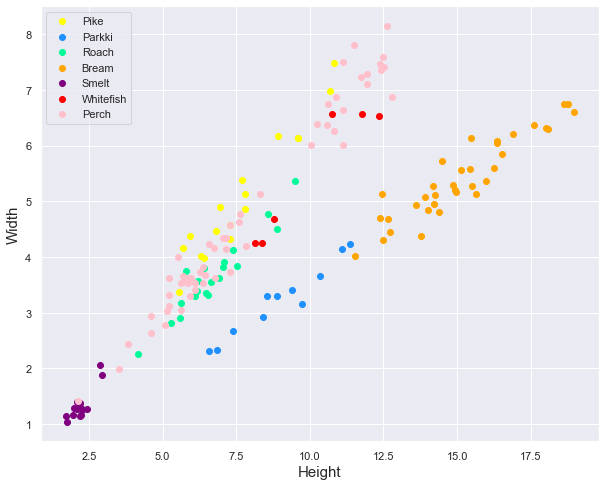

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
Fish_Market = pd.read_csv("/Users/chan/Desktop/Data Science 4/Github Repository/Datasets/Fish.csv")

# Plot the data
Fish = ["Pike", "Parkki", "Roach", "Bream", "Smelt", "Whitefish", "Perch"]
colors = ["yellow", "dodgerblue", "mediumspringgreen", "orange", "purple", "red", "pink"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(Fish, colors):
    temp_df = Fish_Market[Fish_Market.Species == species]
    ax.scatter(temp_df.Height,
               temp_df.Width,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("Height", fontsize = 15)
ax.set_ylabel("Width", fontsize = 15)
ax.legend()
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

X = Fish_Market[["Length2",
          "Length3"]].to_numpy()

y = Fish_Market["Species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

Now we need to define the distance function as well as our k nearest neighbors function.

In [3]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 16.585837331892535


In [4]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]


In [5]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 7)

[[array([31.7, 35. ]), 'Roach', 1.486606874731849],
 [array([31., 34.]), 'Whitefish', 1.7999999999999972],
 [array([31. , 36.2]), 'Bream', 2.8425340807103794],
 [array([30., 35.]), 'Bream', 2.9732137494636985],
 [array([30. , 35.1]), 'Bream', 3.0083217912982625],
 [array([34.5, 36.5]), 'Perch', 3.0232432915661964],
 [array([29.7, 34.5]), 'Bream', 3.140063693621514]]

In [6]:
# Test our function 
y_test[-1]

'Perch'

Now we need to write a function that would predict our next target label.

In [7]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k



In [8]:
KNN_Predict(X_test[-1], X_train, y_train, 7)

'Bream'

Computing our classifcation error.

In [9]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

Our K value is very important in KNN as it can be not the easiest thing to find. A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. So in turn you have to play around with it.

In [22]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 2)

0.2641509433962264

In [23]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

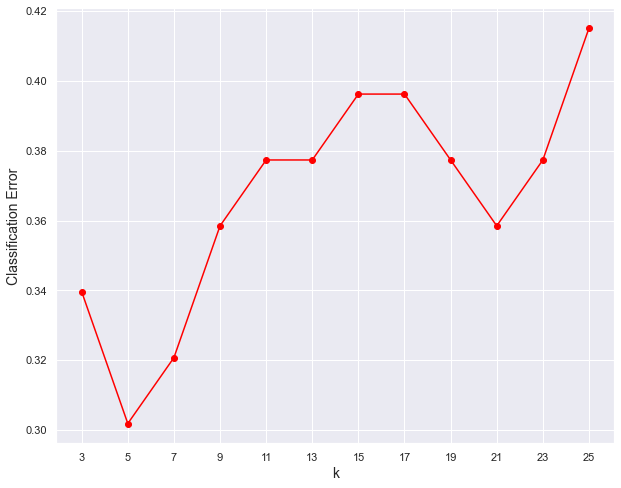

In [24]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

As our best possible K value equals 2, this gives us the most optimal classification error as it is the smallest one from all of the other values that i've tried.